In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import copy

In [16]:
#import mapclassify
#import geopandas as gpd
#%matplotlib inline

In [259]:
all_businesses = pd.read_csv('CSVs/all_businesses.csv', index_col=0, dtype={'zip_code': str})

## There are 12,436 businesses contained in this DF. 

## This notebook aims to glean more insights about the data we are working with

## This notebook will investigate:

alias (separated by '-') ** by making word clouds of frequent terms used in business description (on yelp)

name (full name of business) ** by making word clouds of frequent words used in business name

review_count (float) ** by finding avg overall and avg per zipcode

rating (float) ** by finding avg overall and avg per zipcode

business_type (not all filled in but could interesting to count)


In [91]:
closed_df = all_businesses[all_businesses.is_closed]
open_df = all_businesses[all_businesses.is_closed == False]

In [289]:
def create_word_cloud(dataframe, column, sep_val, stop_words, outputfilename):
    '''
    Function to create a wordcloud based on the text in a specified column of a specified
    dataframe. In the business dataset, the words in 'alias' are seperated by '-' but
    in name by ' ' so we specify that as a parameter as well. Additionally, if there are 
    stop words beyond those included in the wordcloud package, they can be added (adding 'chicago' 
    proves to clean many of our word cloud outputs)
    '''
    
    full_terms = ""
    for response in dataframe[column]:
        sep_resp = response.replace(sep_val, ' ').split(' ')
        for word in sep_resp: #append word
            full_terms += word.lower() + " " #" ".join(word.lower())+" "#.append(word.lower())

    mystopwords = copy.deepcopy(set(STOPWORDS))
    for stop_w in stop_words:
        mystopwords.add(stop_w)

    mywordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = mystopwords, 
                    min_font_size = 10).generate(full_terms) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(mywordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()
    
    mywordcloud.to_file(outputfilename)
    
    return full_terms
        
#alias_list = [alias_list.append(alias) for alias in all_businesses['alias']]

Overview of data: number of open and closed businesses:

In [119]:
print(len(closed_df)) #889 closed businesses
print(len(open_df)) #11,547 open businesses

889
11547


Look at the average review count and rating for open and closed businesses:

In [118]:
means = {'type': ['review_count', 'rating'], 'closed': [round(closed_df[['review_count']].mean()[0],2), round(closed_df[['rating']].mean()[0], 2)], 'open': [round(open_df[['review_count']].mean()[0], 2), round(open_df[['rating']].mean()[0],2)], 'all_businesses': [round(all_businesses[['review_count']].mean()[0], 2), round(all_businesses[['rating']].mean()[0], 2)]}
pd.DataFrame(means)

,type,closed,open,all_businesses
0,review_count,124.40,127.26,127.06
1,rating,3.63,3.57,3.57


Look at the breakdown of popular 'business types': note this variable does not exist for the entire dataset, only for those merged into the dataset from the health inspection data

In [274]:
busi_type = copy.deepcopy(all_businesses.groupby("business_type"))
#to avoid changing the original dataset
desc_df = pd.DataFrame(busi_type.describe())
#.sort_values('count', ascending=False)
desc_df['review_count'].sort_values('count', ascending=False)[0:20]

,count,mean,std,min,25%,50%,75%,max
business_type,,,,,,,,
Restaurant,2535.0,199.836686,410.699347,1.0,19.00,76.0,227.50,8713.0
Grocery Store,248.0,16.483871,34.589433,1.0,2.00,5.0,17.00,395.0
School,113.0,4.221239,8.525942,1.0,1.00,2.0,4.00,87.0
Children's Services Facility,60.0,7.266667,6.645673,1.0,1.75,5.0,11.25,25.0
Bakery,53.0,64.150943,172.801397,1.0,6.00,15.0,45.00,1152.0
Long Term Care,48.0,4.479167,4.828945,1.0,1.00,2.5,5.25,25.0
Daycare Above and Under 2 Years,23.0,9.782609,11.114922,1.0,2.00,5.0,13.50,42.0
Catering,22.0,156.818182,487.745800,1.0,6.25,22.0,54.25,2304.0
Liquor,19.0,42.947368,66.841000,1.0,2.50,14.0,42.50,213.0


## Word density plot of the alias (descriptors) for ALL businesses in chicago

In [87]:
#uncleaned_alias = create_word_cloud(all_businesses, 'alias', '-', [])

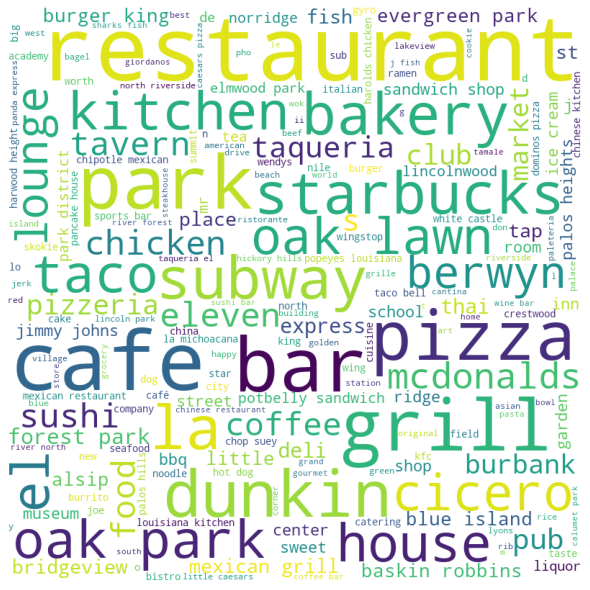

In [290]:
cleaned_alias = create_word_cloud(all_businesses, 'alias', '-', ['chicago'], "all_alias_wordcloud.png")

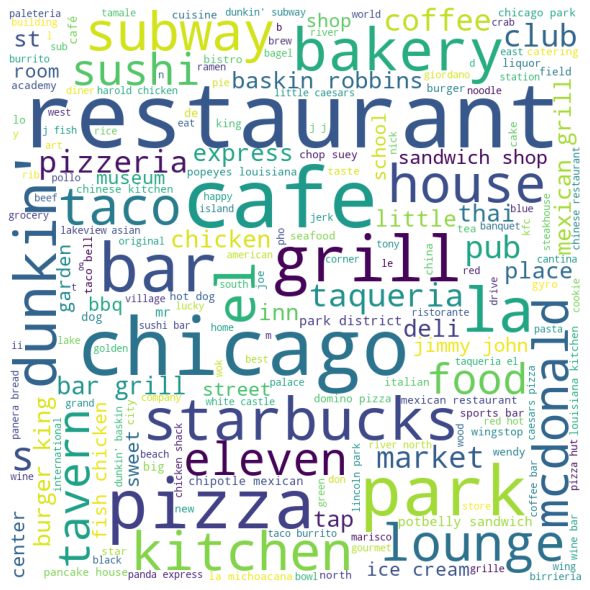

In [291]:
uncleaned_res_name = create_word_cloud(all_businesses, 'name', ' ', [], "all_name_wordcloud.png")

In [292]:
#cleaned_res_name = create_word_cloud(all_businesses, 'name', '-', ['restaurant', 'chicago', 'cafe', 'park', 'bar'])

## Word clouds of the alias (descriptors) and restaurant names for open and closed businesses in chicago - as a comparison

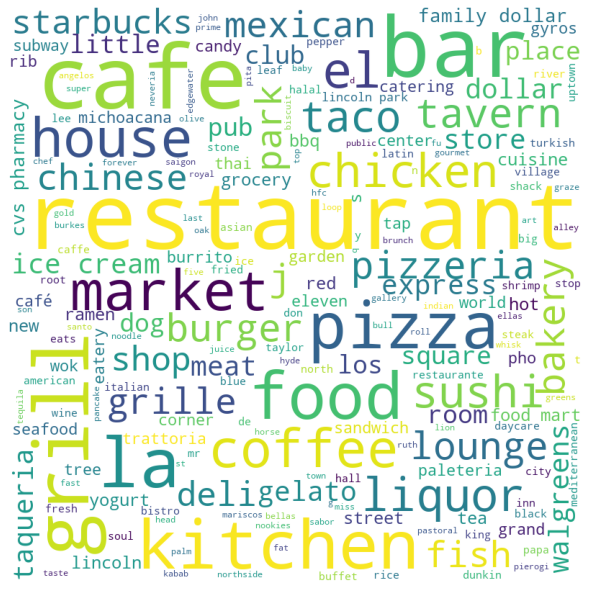

In [293]:
closed_alias_wc = create_word_cloud(closed_df, 'alias', '-', ['chicago'], "closed_alias_wordcloud.png")

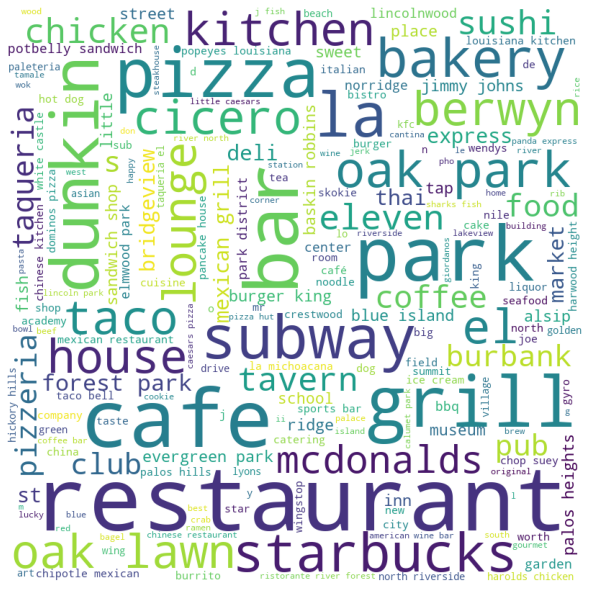

In [294]:
open_alias_wc = create_word_cloud(open_df, 'alias', '-', ['chicago'], "open_alias_wordcloud.png")

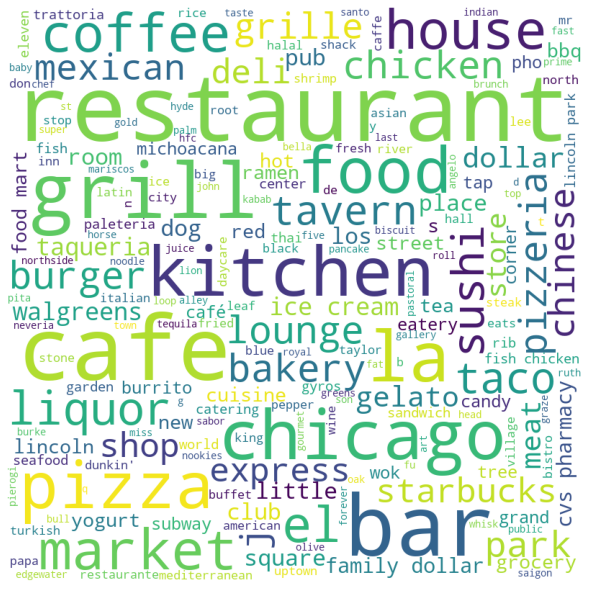

In [295]:
closed_name_wc = create_word_cloud(closed_df, 'name', '-', [], "closed_name_wordcloud.png")

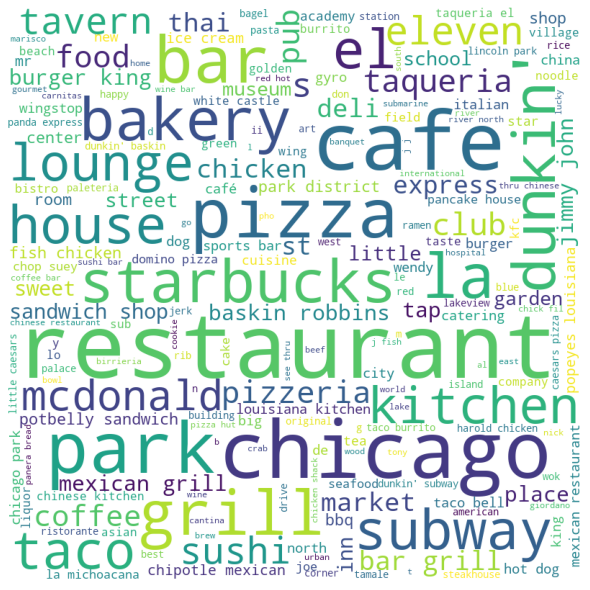

In [296]:
open_name_wc = create_word_cloud(open_df, 'name', '-', [], "open_name_wordcloud.png")

In [93]:
open_df.head()

,id,alias,name,is_claimed,is_closed,review_count,rating,coordinates,business_type,price,...,city,state,delivery,pickup,covid_cases,covid_tests,covid_deaths,zipcode_population,latitude,longitude
0,2OGQfIsT33WC7sCKdqKuuw,carmelo-s-taco-place-chicago,Carmelo’s Taco Place,True,False,12.0,4.5,"{'latitude': 41.78663, 'longitude': -87.69294}",Restaurant,NaN,...,Chicago,IL,True,True,14161.0,81300.0,200.0,111850.0,41.786630,-87.692940
1,YULX9j3fdcLtUNYHax19JA,maggie-gyros-and-chicken-chicago,Maggie Gyros & Chicken,False,False,5.0,2.5,"{'latitude': 41.8092351, 'longitude': -87.6178...",Restaurant,NaN,...,Chicago,IL,True,True,1914.0,30921.0,52.0,31972.0,41.809235,-87.617828
2,6hhWuqvuEIEescMsh807pw,morenas-kitchen-chicago,Morena's Kitchen,True,False,41.0,4.5,"{'latitude': 41.916978, 'longitude': -87.753176}",Restaurant,1.0,...,Chicago,IL,True,True,11734.0,72864.0,193.0,90517.0,41.916978,-87.753176
3,VA1mmPgB4HcOpyw_-IA6DQ,northern-trust-chicago,Northern Trust,True,False,8.0,2.5,"{'latitude': 41.881284, 'longitude': -87.632567}",Restaurant,NaN,...,Chicago,IL,False,False,49.0,1114.0,0.0,1174.0,41.881284,-87.632567
4,YHToK3BYKGJudH_UNUCeVw,deli-and-more-chicago,Deli & More,True,False,9.0,4.5,"{'latitude': 41.9333267211914, 'longitude': -8...",Grocery Store,2.0,...,Chicago,IL,True,True,3633.0,72186.0,42.0,70052.0,41.933327,-87.638618


In [232]:
zipcodes_closed_nonagg = closed.loc[:, ['id', 'zip_code']].groupby('zip_code').count().sort_values('id', ascending=False)

In [233]:
zipcodes_closed_nonagg

,id
zip_code,
60622,57
60614,50
60607,47
60647,43
60618,40
60657,39
60625,32
60654,31
60611,31


In [ ]:
ax = sns.barplot("size", y="total_bill", data=tips, palette="Blues_d")

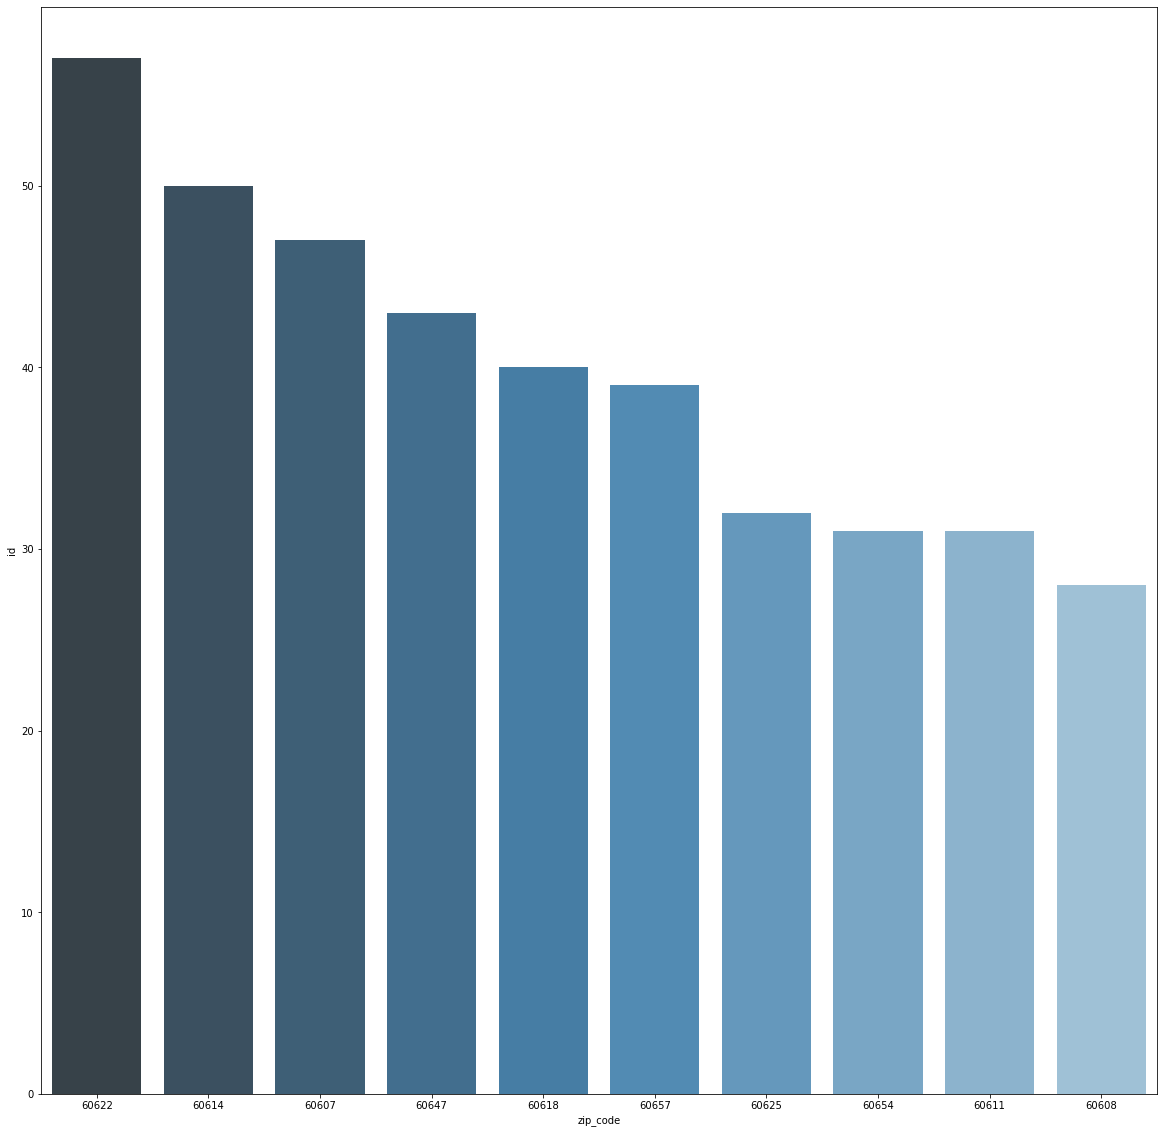

In [235]:
closed_by_zip_top10 = sns.barplot(x=zipcodes_closed_nonagg.index[:10], y=zipcodes_closed_nonagg.id[:10], palette="Blues_d", order=zipcodes_closed_nonagg.index[:10])
fig = closed_by_zip_top10.get_figure()
fig.savefig('top10closedzips.png')

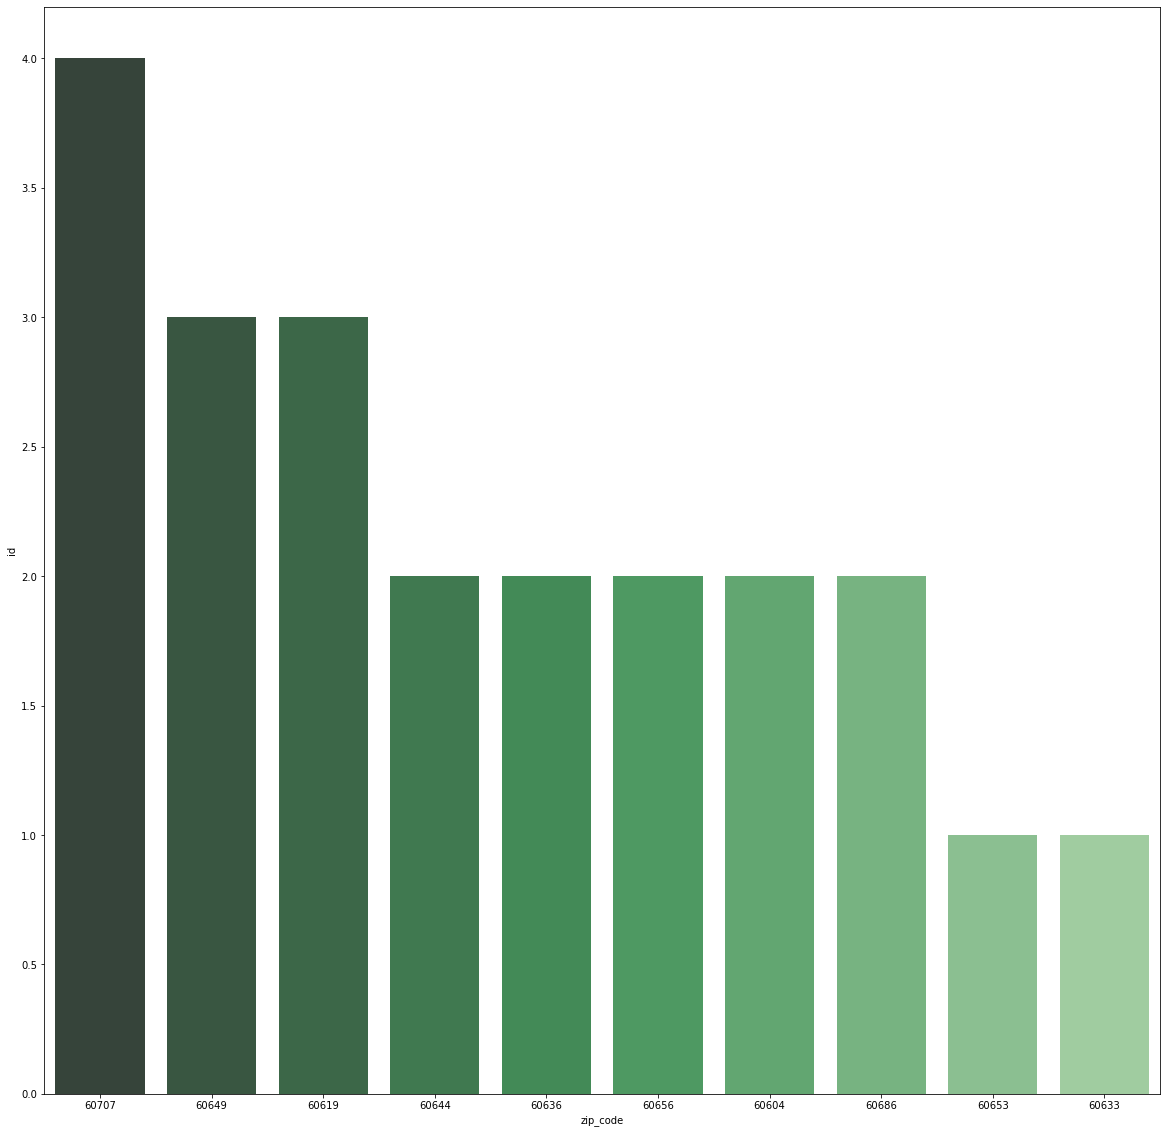

In [230]:
closed_by_zip_bottom10 = sns.barplot(x=zipcodes_closed.index[-12:-2], y=zipcodes_closed.id[-12:-2], palette="Greens_d", order=zipcodes_closed.index[-12:-2])
fig = closed_by_zip_top10.get_figure()
fig.savefig('bottom10closedzips.png')

In [120]:
zipcodes_closed = closed_df.loc[:, ['id', 'zip_code']].groupby('zip_code').count().sort_values('id', ascending=False)

In [121]:
zipcodes_open = open_df.loc[:, ['id', 'zip_code']].groupby('zip_code').count().sort_values('id', ascending=False)

In [129]:
zipcodes_openclosed = pd.merge(zipcodes_closed, zipcodes_open, on='zip_code')
zipcodes_openclosed.columns = ['num_closed', 'num_open']
zipcodes_openclosed['closure_rate'] = zipcodes_openclosed.num_closed / zipcodes_openclosed.num_open

In [298]:
zipcodes_openclosed.sort_values('closure_rate', ascending=False)[0:10]

,num_closed,num_open,closure_rate
zip_code,,,
60630,25,153,0.163399
60659,27,166,0.162651
60621,4,26,0.153846
60622,57,377,0.151194
60652,9,63,0.142857
60643,14,103,0.135922
60642,19,144,0.131944
60651,9,69,0.130435
60607,47,368,0.127717


In [236]:
rating_zipc_df = open_df.groupby(['zip_code'],as_index = True)['rating'].mean()
reviews_zipc_df = open_df.groupby(['zip_code'],as_index = True)['review_count'].mean()
merge_rating_reviews = pd.merge(rating_zipc_df, reviews_zipc_df, on='zip_code')

In [237]:
#rate_mean = merge_rating_reviews['rating'].mean()
#merge_rating_reviews["rating_eval"] = ["above average" if rate > rate_mean else "below average" for rate in merge_rating_reviews['rating']]

In [238]:
merge_rating_reviews.reset_index(inplace=True)

In [239]:
closed_rating_zipc_df = closed_df.groupby(['zip_code'],as_index = True)['rating'].mean()
closed_reviews_zipc_df = closed_df.groupby(['zip_code'],as_index = True)['review_count'].mean()
closed_merge_rating_reviews = pd.merge(closed_rating_zipc_df, closed_reviews_zipc_df, on='zip_code')
#closed_rate_mean = closed_merge_rating_reviews['rating'].mean()
#closed_merge_rating_reviews["rating_eval"] = ["above average" if rate > rate_mean else "below average" for rate in closed_merge_rating_reviews['rating']]
closed_merge_rating_reviews.reset_index(inplace=True)

In [240]:
merge_rating_reviews['is_closed'] = False
closed_merge_rating_reviews['is_closed'] = True
all_merge_rating_reviews = pd.concat([merge_rating_reviews, closed_merge_rating_reviews])

In [241]:
all_merge_rating_reviews

,zip_code,rating,review_count,is_closed
0,60007,3.250000,35.500000,False
1,60018,3.500000,66.000000,False
2,60068,3.833333,146.666667,False
3,60076,3.615385,75.384615,False
4,60077,3.119048,127.476190,False
...,...,...,...,...
53,60659,3.777778,61.111111,True
54,60660,3.444444,83.222222,True
55,60661,4.029412,181.588235,True
56,60686,3.250000,32.500000,True


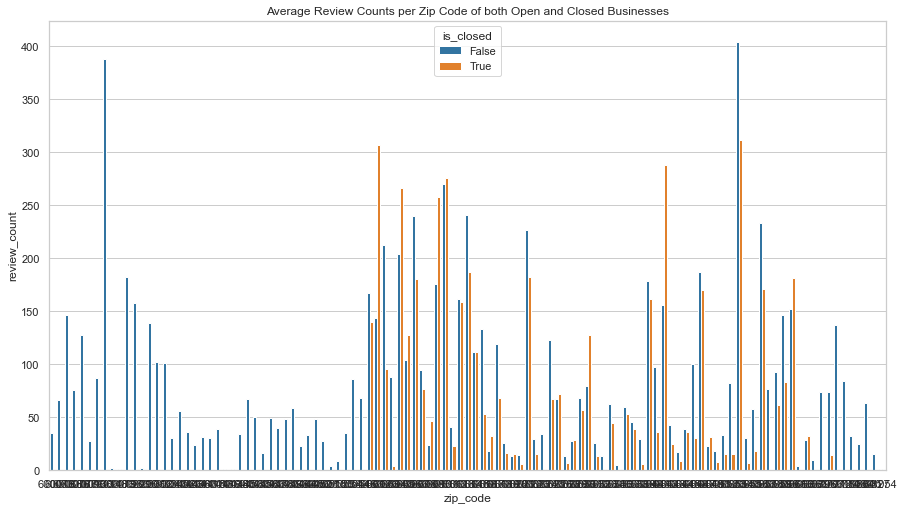

In [245]:
#ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
sns.set_context("paper", font_scale=1.2)
sns.set_theme(style="whitegrid")
avg_rating_eval = sns.barplot(x = "zip_code", y = "review_count", hue = "is_closed", data = all_merge_rating_reviews).set_title("Average Review Counts per Zip Code of both Open and Closed Businesses")
fig = avg_rating_eval.get_figure()
fig.set_size_inches(15, 8.27)
fig.savefig('ALL_avg_reviews.png')

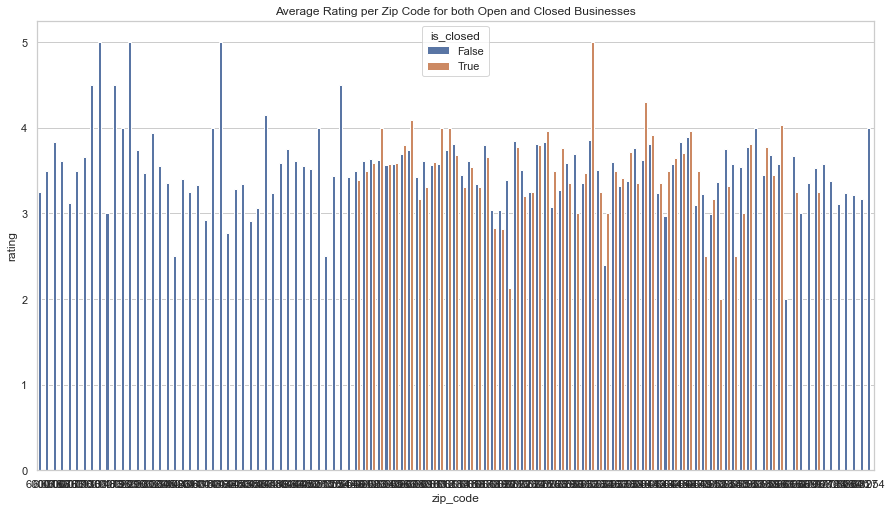

In [246]:
sns.set_context("paper", font_scale=1.2)
sns.set_theme(style="whitegrid")
avg_rating_eval = sns.barplot(x = "zip_code", y = "rating", hue = "is_closed", data = all_merge_rating_reviews).set_title("Average Rating per Zip Code for both Open and Closed Businesses")
fig = avg_rating_eval.get_figure()
fig.set_size_inches(15, 8.27)
fig.savefig('ALL_avg_rating.png')

In [210]:
rating_zipc_df.sort_values(ascending=False).head() #max = 5
reviews_zipc_df.sort_values(ascending=False).head() #max = 403
closed_rating_zipc_df.sort_values(ascending=False).head() #max = 5
closed_reviews_zipc_df.sort_values(ascending=False).head() #max = 310

zip_code
60633    5.000000
60641    4.300000
60608    4.089286
60661    4.029412
60612    4.000000
Name: rating, dtype: float64

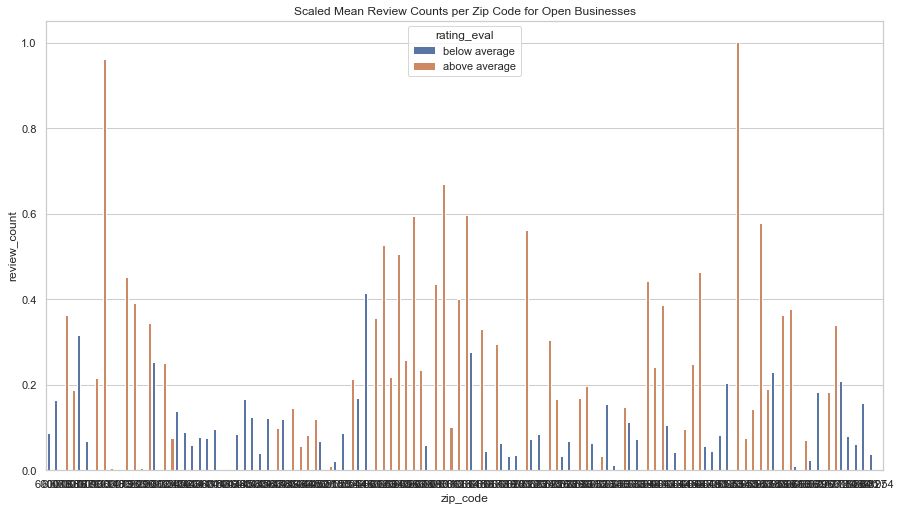

In [219]:
#ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
sns.set_context("paper", font_scale=1.2)
sns.set_theme(style="whitegrid")
avg_rating_eval = sns.barplot(x = "zip_code", y = "review_count", hue = "rating_eval", data = merge_rating_reviews).set_title("Scaled Mean Review Counts per Zip Code for Open Businesses")
fig = avg_rating_eval.get_figure()
fig.set_size_inches(15, 8.27)
fig.savefig('OPENavg_rating_eval.png')

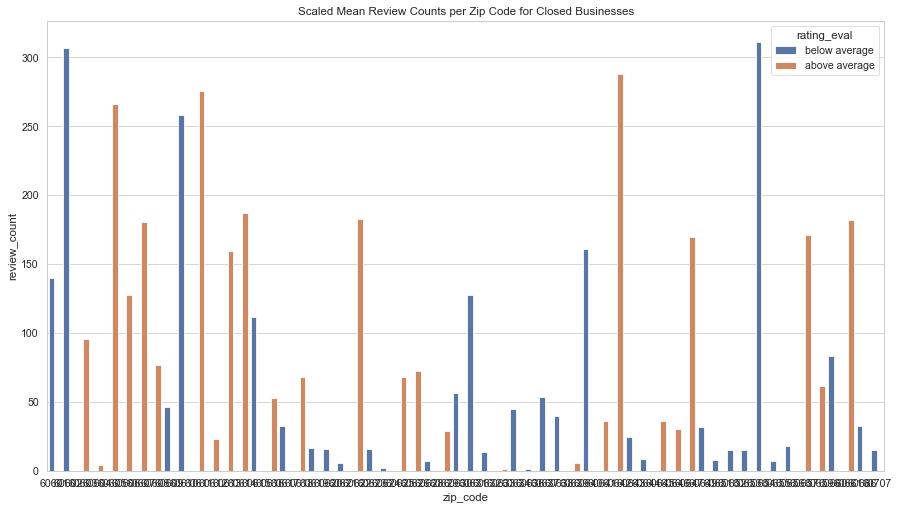

In [220]:
#ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
sns.set_context("paper", font_scale=1.2)
sns.color_palette("hls", 8)
closed_avg_rating_eval = sns.barplot(x = "zip_code", y = "review_count", hue = "rating_eval", data = closed_merge_rating_reviews).set_title("Scaled Mean Review Counts per Zip Code for Closed Businesses")
fig = closed_avg_rating_eval.get_figure()
fig.set_size_inches(15, 8.27)
fig.savefig('CLOSEDavg_rating_eval.png')

In [152]:
pd.DataFrame(merge_rating_reviews)

,rating,review_count
zip_code,,
60007,3.250000,35.500000
60018,3.500000,66.000000
60068,3.833333,146.666667
60076,3.615385,75.384615
60077,3.119048,127.476190
...,...,...
60803,3.109375,31.953125
60804,3.243333,24.913333
60805,3.213115,63.868852


In [253]:
all_businesses['death_rate'] = all_businesses.covid_deaths / all_businesses.zipcode_population
all_businesses['case_rate'] = all_businesses.covid_cases / all_businesses.zipcode_population

In [ ]:
merge_rating_reviews = pd.merge(rating_zipc_df, reviews_zipc_df, on='zip_code')

In [ ]:
sns.set_context("paper", font_scale=1.2)
avg_rating_eval = sns.barplot(x = "zip_code", y = "review_count", hue = "rating_eval", data = merge_rating_reviews).set_title("Scaled Mean Review Counts per Zip Code")
fig = avg_rating_eval.get_figure()
fig.set_size_inches(15, 8.27)
fig.savefig('avg_rating_eval.png')

In [259]:
rates = all_businesses.loc[:, ['zip_code', 'death_rate', 'case_rate']].drop_duplicates('zip_code')

In [232]:
zipcodes_closed_nonagg = closed.loc[:, ['id', 'zip_code']].groupby('zip_code').count().sort_values('id', ascending=False)